In [1]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
#columns to be normalized
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [8]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()))

In [9]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [10]:
import tensorflow as tf

/home/jackalhan/Development/github/more_meaningful_representations/venv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [12]:
# continous feature columns with tf
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_predigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [13]:
# non continous values, categorical values
# 2 options, DICT and HASH BUCKET
# We are going to see the two of them. 

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C','D'])

In [15]:
#If we do not know all the groupings, if there is tons of groupsings, we can use the hash bucket
#Tensorflow is defining groups based on the name we provide as a column and the size. We can have a bigger size
# although real grouping is smllaer than this size, on the backgound tf is handling it. 
# -------------------------------
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
# -------------------------------

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

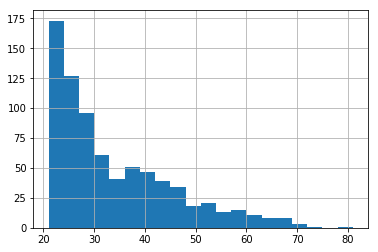

In [20]:
# 20 bins in this histogram
diabetes['Age'].hist(bins=20)
# this hist tells us that what are the sizes of the age in the age range 
# basically, distributions of the ages

In [21]:
#this is going to create the buckets of values between 20 and 30, 30 and 40, 50 and......
# continous numeric into categorical columns
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [22]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_predigree, 
            assigned_group,age_bucket]

In [23]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [ ]:
labels = diabetes['Class']
labels

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state=101)

In [27]:
# now estimator time
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train, y=y_train,
                                                batch_size=10, num_epochs=1000,
                                                shuffle=True)

In [28]:
##############################
# LINEAR CLASSIFIER
##############################
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_task_id': 0, '_num_ps_replicas': 0, '_is_chief': True, '_tf_random_seed': None, '_num_worker_replicas': 1, '_service': None, '_master': '', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb92f5c89e8>, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpe3xlybcj', '_task_type': 'worker'}


In [29]:
model.train(input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpe3xlybcj/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 44.2889
INFO:tensorflow:loss = 6.7352667, step = 101 (2.259 sec)
INFO:tensorflow:global_step/sec: 44.9319
INFO:tensorflow:loss = 5.4966593, step = 201 (2.225 sec)
INFO:tensorflow:global_step/sec: 45.3692
INFO:tensorflow:loss = 5.349855, step = 301 (2.204 sec)
INFO:tensorflow:global_step/sec: 45.8861
INFO:tensorflow:loss = 5.684064, step = 401 (2.181 sec)
INFO:tensorflow:global_step/sec: 46.3572
INFO:tensorflow:loss = 5.745453, step = 501 (2.155 sec)
INFO:tensorflow:global_step/sec: 41.9523
INFO:tensorflow:loss = 5.1855636, step = 601 (2.385 sec)
INFO:tensorflow:global_step/sec: 46.3282
INFO:tensorflow:loss = 7.367931, step = 701 (2.161 sec)
INFO:tensorflow:global_step/sec: 44.8144
INFO:tensorflow:loss = 4.840305, step = 801 (2.229 sec)
INFO:tensorflow:global_step/sec: 45.6003
INFO:tensorflow:los

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, 
                                                      batch_size=10, 
                                                      num_epochs=1,
                                                      shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-28-00:35:27
INFO:tensorflow:Restoring parameters from /tmp/tmpe3xlybcj/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-28-00:35:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8048971, auc_precision_recall = 0.648346, average_loss = 0.52251774, global_step = 1000, label/mean = 0.35064936, loss = 5.029233, prediction/mean = 0.35382357


In [33]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8048971,
 'auc_precision_recall': 0.648346,
 'average_loss': 0.52251774,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.029233,
 'prediction/mean': 0.35382357}

In [34]:
# GET PREDICTIONS
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, 
                                                     num_epochs=1,
                                                     shuffle=False)

In [35]:
predictions = list(model.predict(pred_input_func))

INFO:tensorflow:Restoring parameters from /tmp/tmpe3xlybcj/model.ckpt-1000


In [36]:
predictions

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5180344], dtype=float32),
  'logits': array([0.07216907], dtype=float32),
  'probabilities': array([0.48196554, 0.5180344 ], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6300078], dtype=float32),
  'logits': array([0.53225017], dtype=float32),
  'probabilities': array([0.36999223, 0.6300078 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35268882], dtype=float32),
  'logits': array([-0.60724103], dtype=float32),
  'probabilities': array([0.6473112 , 0.35268882], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32318076], dtype=float32),
  'logits': array([-0.73919237], dtype=float32),
  'probabilities': array([0.67681926, 0.32318076], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=

In [43]:
##############################
# DENSE NEURAL NETWORK CLASSIFIER
##############################

In [40]:
# we need to embed categorical feature columns
embedded_assigned_group = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [41]:
# replace the assigned group with our new embeddings assigned group
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_predigree, 
            embedded_assigned_group,age_bucket]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, 
                                                 batch_size =10, 
                                                 num_epochs=1000, 
                                                 shuffle=True)

In [49]:
# 3 layers and each of the layers has 10 neurons densely connected in the next layer
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_task_id': 0, '_num_ps_replicas': 0, '_is_chief': True, '_tf_random_seed': None, '_num_worker_replicas': 1, '_service': None, '_master': '', '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb92f53a860>, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpqdckuw42', '_task_type': 'worker'}


In [50]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpqdckuw42/model.ckpt.
INFO:tensorflow:loss = 7.1604066, step = 1
INFO:tensorflow:global_step/sec: 40.012
INFO:tensorflow:loss = 5.166228, step = 101 (2.501 sec)
INFO:tensorflow:global_step/sec: 41.0417
INFO:tensorflow:loss = 5.325469, step = 201 (2.436 sec)
INFO:tensorflow:global_step/sec: 40.1392
INFO:tensorflow:loss = 3.4941585, step = 301 (2.491 sec)
INFO:tensorflow:global_step/sec: 37.18
INFO:tensorflow:loss = 5.6158056, step = 401 (2.691 sec)
INFO:tensorflow:global_step/sec: 38.957
INFO:tensorflow:loss = 4.5501266, step = 501 (2.564 sec)
INFO:tensorflow:global_step/sec: 37.3216
INFO:tensorflow:loss = 6.527951, step = 601 (2.680 sec)
INFO:tensorflow:global_step/sec: 40.276
INFO:tensorflow:loss = 4.692581, step = 701 (2.481 sec)
INFO:tensorflow:global_step/sec: 68.0565
INFO:tensorflow:loss = 3.0658052, step = 801 (1.471 sec)
INFO:tensorflow:global_step/sec: 36.435
INFO:tensorflow:loss = 

In [47]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= X_test, y=y_test, 
                                                      batch_size=10, num_epochs=1, shuffle=False)

In [51]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-28-00:59:18
INFO:tensorflow:Restoring parameters from /tmp/tmpqdckuw42/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-03-28-00:59:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7532467, accuracy_baseline = 0.64935064, auc = 0.8332921, auc_precision_recall = 0.707161, average_loss = 0.47855672, global_step = 1000, label/mean = 0.35064936, loss = 4.606108, prediction/mean = 0.34996653


{'accuracy': 0.7532467,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8332921,
 'auc_precision_recall': 0.707161,
 'average_loss': 0.47855672,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.606108,
 'prediction/mean': 0.34996653}